In [15]:
!pip install karateclub

In [16]:
import networkx as nx
from karateclub import DeepWalk 
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Graph Visualization

Number of nodes (club-members) 34


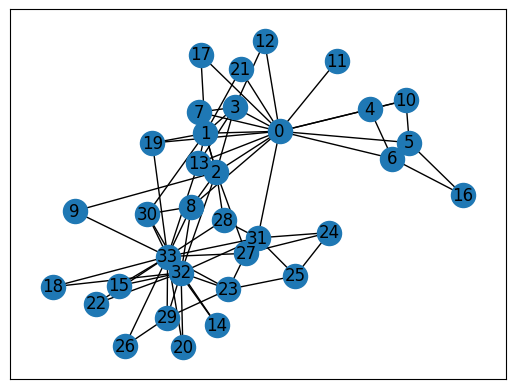

In [17]:
G = nx.karate_club_graph() # load the Zachary's karate club graph
print('Number of nodes (club-members)', len(G.nodes))
nx.draw_networkx(G)

We label the graph since it contains only two clubs

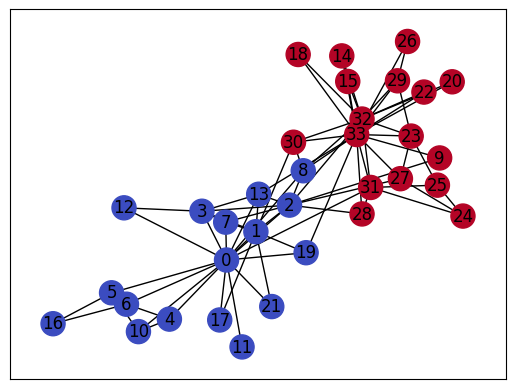

In [18]:
labels = []
for i in G.nodes:
    club_names = G.nodes[i]['club']
    labels.append(1 if club_names == 'Officer' else 0) #Clubs: 'Officer' or 'Mr.Hi'
    
layout_pos = nx.spring_layout(G)
nx.draw_networkx(G,pos = layout_pos ,node_color = labels, cmap='coolwarm')


# DeepWalk node embedding

In [19]:
Deepwalk_model = DeepWalk(walk_number=10, walk_length=80, dimensions=124)
Deepwalk_model.fit(G)
embedding = Deepwalk_model.get_embedding()
print('Embedding array shape (nodes x features):',embedding.shape )

Embedding array shape (nodes x features): (34, 124)


In [20]:
embedding

array([[ 0.01205775, -0.26596904,  0.22293754, ...,  0.27918193,
         0.07059792, -0.6735199 ],
       [ 0.09858561, -0.08884765,  0.20199516, ...,  0.12228802,
        -0.02985269, -0.33254966],
       [ 0.11998069,  0.02922679,  0.13025181, ..., -0.02204138,
        -0.09673046, -0.1295432 ],
       ...,
       [ 0.13105309,  0.07136078,  0.12227461, ..., -0.19087017,
        -0.22046697, -0.2559998 ],
       [ 0.21987025,  0.17558445,  0.12867047, ..., -0.21651155,
        -0.2599088 , -0.01681669],
       [ 0.17278387,  0.15959616,  0.12673098, ..., -0.1884643 ,
        -0.24267632, -0.07505326]], dtype=float32)

# Low dimensional embedding visualization

Low dimensional embedding representaiton (nodes x 2): (34, 2)


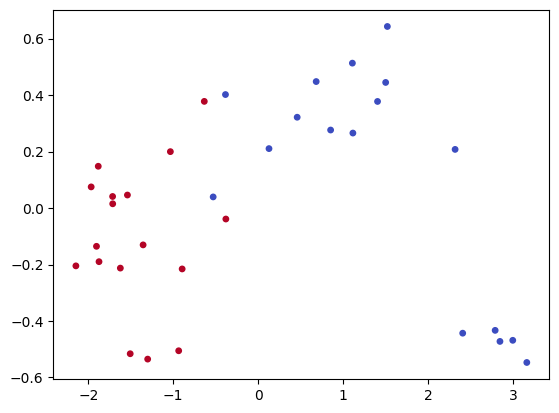

In [21]:
PCA_model = sklearn.decomposition.PCA(n_components=2)
lowdimension_embedding = PCA_model.fit_transform(embedding)
print('Low dimensional embedding representaiton (nodes x 2):', lowdimension_embedding.shape)
plt.scatter(lowdimension_embedding[:,0],lowdimension_embedding[:,1],c=labels,
            s=15,cmap='coolwarm')


# Node classification using the embedding model

In [22]:
x_train,x_test,y_train,y_test = train_test_split(embedding, labels, test_size=0.3)
ML_model = LogisticRegression(random_state=0).fit(x_train,y_train)
y_predict = ML_model.predict(x_test)
ML_acc = roc_auc_score(y_test,y_predict)
print('AUC:',ML_acc)

AUC: 0.9
